**Sobre o conjunto de dados**
Este conjunto de dados contém os seguintes recursos:

'Tempo diário gasto no site': tempo do consumidor no site em minutos

'Age': idade do cliente em anos

'Area Income': Avg. Renda da área geográfica do consumidor

'Uso Diário da Internet': Avg. minutos por dia o consumidor está na internet

'Ad Topic Line': Título do anúncio

'City': Cidade do consumidor

'Masculino': Se o consumidor era ou não do sexo masculino

'País': País do consumidor

'Timestamp': Hora em que consumidor clicou no anúncio ou fechou a janela

'Clicou no anúncio': 0 ou 1 indicou clicar no anúncio

# **Importando os dados:**

In [334]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost.sklearn import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

%matplotlib inline

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [335]:
df = pd.read_csv("advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


**Vamos dividir a coluna de tempo para Data e Hora:**

In [336]:
lista_tempo = []
lista_data = []
lista_hora = []
for i in range(0, len(df["Timestamp"])):
  lista_data.append(df["Timestamp"][i].split(",")[0].split(" ")[0])
  lista_hora.append(df["Timestamp"][i].split(",")[0].split(" ")[1])
df["Date"] = lista_data
df["Hour"] = lista_hora
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,03:36:18
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,2016-02-11,21:49:00
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2016-04-22,02:07:01
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,2016-02-01,17:24:57
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2016-03-24,02:35:54


**Vamos transformar todas as colunas que contenham data em datetime:**

In [337]:
df["Date"] = pd.to_datetime(df["Date"])
df["Hour"] = pd.to_datetime(df["Hour"])
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [338]:
df.dtypes

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
Date                        datetime64[ns]
Hour                        datetime64[ns]
dtype: object

Percebe-se que não há dados nulos

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Date                      1000 non-null   datetime64[ns]
 11  Hour                      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](3),

In [340]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [341]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


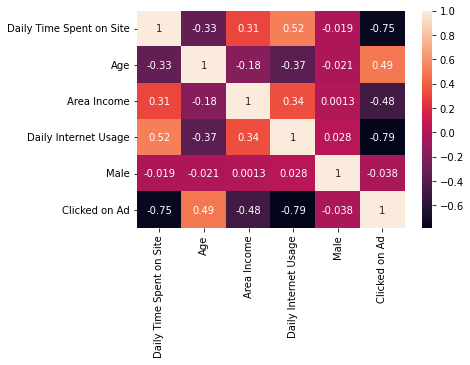

In [342]:
sns.heatmap(df.corr(), annot=True);

**Verificação de outliers**

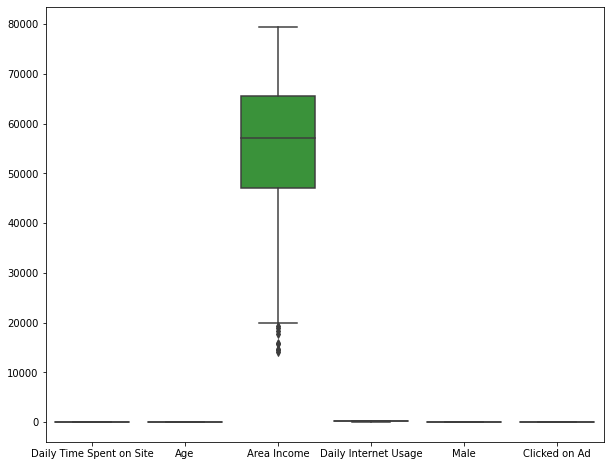

In [343]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)

# **XGBOOST CLASSIFIER**

In [163]:
#Separando o que é features e target:
X = df.drop(columns=["Clicked on Ad"])
y = df["Clicked on Ad"]

# Dividindo em dados de teste e dados de treino, peguei 30% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12, stratify=y)


# Iniciando a construção da Pipeline:
# ==========================================================
#Primeiro vamos tratar as features numéricas.
pipe_features_num = Pipeline([("std", StandardScaler())])

# Pegando só as features numéricas
features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================
#Vamos tratar as features categóricas.
pipe_features_ohe = Pipeline([("onehot", OneHotEncoder(handle_unknown = "ignore"))])

features_ohe = ["Male"]

pipe_features_oe = Pipeline([("input_cat_oe", SimpleImputer(strategy="constant", fill_value="unknown")),
                             ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

features_oe = ["Ad Topic Line", "City", "Country"]
# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat_ohe", pipe_features_ohe, features_ohe),
                                     ("transf_cat_oe", pipe_features_oe, features_oe)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o XGBoost para regressão.
pipe_xgbr = Pipeline([("pre_processador", pre_processador),
                      ("pca", PCA(n_components=2)),
                      ("xgbr", XGBClassifier(eval_metric='logloss', random_state=42))])


# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

#Montando a grade de parâmetros do estimador (XGBoost)
params_grid_xgbr = {"xgbr__n_estimators": [500, 1000, 2000],
                   "xgbr__max_depth": [1, 2, 8, 10],
                   "xgbr__learning_rate": [0.001, 0.0001],
                   "xgbr__colsample_bytree": [0.2],
                   "xgbr__subsample": [0.8]}

#Motando a grade geral de parâmetros.
publicidade_xgbc = GridSearchCV(estimator=pipe_xgbr,
                       param_grid=params_grid_xgbr,
                       scoring="accuracy",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

publicidade_xgbc.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['Daily '
                                                                          'Time '
                                                                          'Spent '
                                                                          'on '
                                                                          'Site',
                                                                          'Age',
                                                                          'Area

In [164]:
publicidade_xgbc.best_params_

{'xgbr__colsample_bytree': 0.2,
 'xgbr__learning_rate': 0.001,
 'xgbr__max_depth': 2,
 'xgbr__n_estimators': 500,
 'xgbr__subsample': 0.8}

In [117]:
grid_xgbr_results = pd.DataFrame(publicidade_xgbc.cv_results_)
grid_xgbr_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbr__colsample_bytree,param_xgbr__learning_rate,param_xgbr__max_depth,param_xgbr__n_estimators,param_xgbr__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.162888,0.003020,0.019422,0.002337,0.5,0.001,2,500,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.333333,0.333333,0.556781,0.412611,0.360731,0.399358,0.083867,1
10,0.260960,0.003998,0.022064,0.002827,0.5,0.001,2,1000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.333333,0.333333,0.556781,0.412611,0.360731,0.399358,0.083867,1
11,0.418817,0.070982,0.020925,0.003169,0.5,0.001,2,2000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.333333,0.333333,0.556781,0.412611,0.360731,0.399358,0.083867,1
4,0.264915,0.004651,0.020952,0.001717,0.5,0.01,2,1000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.333333,0.333333,0.539474,0.412611,0.360731,0.395896,0.077406,4
5,0.460770,0.011532,0.024803,0.005323,0.5,0.01,2,2000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.333333,0.333333,0.474286,0.412611,0.360731,0.382859,0.054110,5
0,0.155940,0.003108,0.020919,0.003194,0.5,0.01,1,500,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.333333,0.333333,0.333333,0.412611,0.360731,0.354668,0.030853,6
1,0.241763,0.022036,0.021080,0.002885,0.5,0.01,1,1000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.333333,0.333333,0.333333,0.412611,0.360731,0.354668,0.030853,6
6,0.157525,0.017006,0.018455,0.000574,0.5,0.001,1,500,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.333333,0.333333,0.333333,0.412611,0.360731,0.354668,0.030853,6
7,0.229361,0.006880,0.025645,0.013122,0.5,0.001,1,1000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.333333,0.333333,0.333333,0.412611,0.360731,0.354668,0.030853,6
8,0.396474,0.005455,0.020498,0.000810,0.5,0.001,1,2000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.333333,0.333333,0.333333,0.412611,0.360731,0.354668,0.030853,6



Métricas de avaliação de treino:
[[334 116]
 [250 200]]


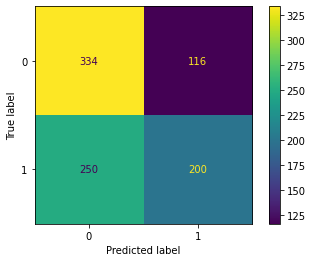

              precision    recall  f1-score   support

           0       0.57      0.74      0.65       450
           1       0.63      0.44      0.52       450

    accuracy                           0.59       900
   macro avg       0.60      0.59      0.58       900
weighted avg       0.60      0.59      0.58       900


Métricas de avaliação de teste:
[[49  1]
 [44  6]]


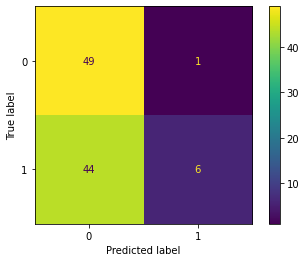

              precision    recall  f1-score   support

           0       0.53      0.98      0.69        50
           1       0.86      0.12      0.21        50

    accuracy                           0.55       100
   macro avg       0.69      0.55      0.45       100
weighted avg       0.69      0.55      0.45       100



In [165]:
### ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = publicidade_xgbc.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = publicidade_xgbc.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

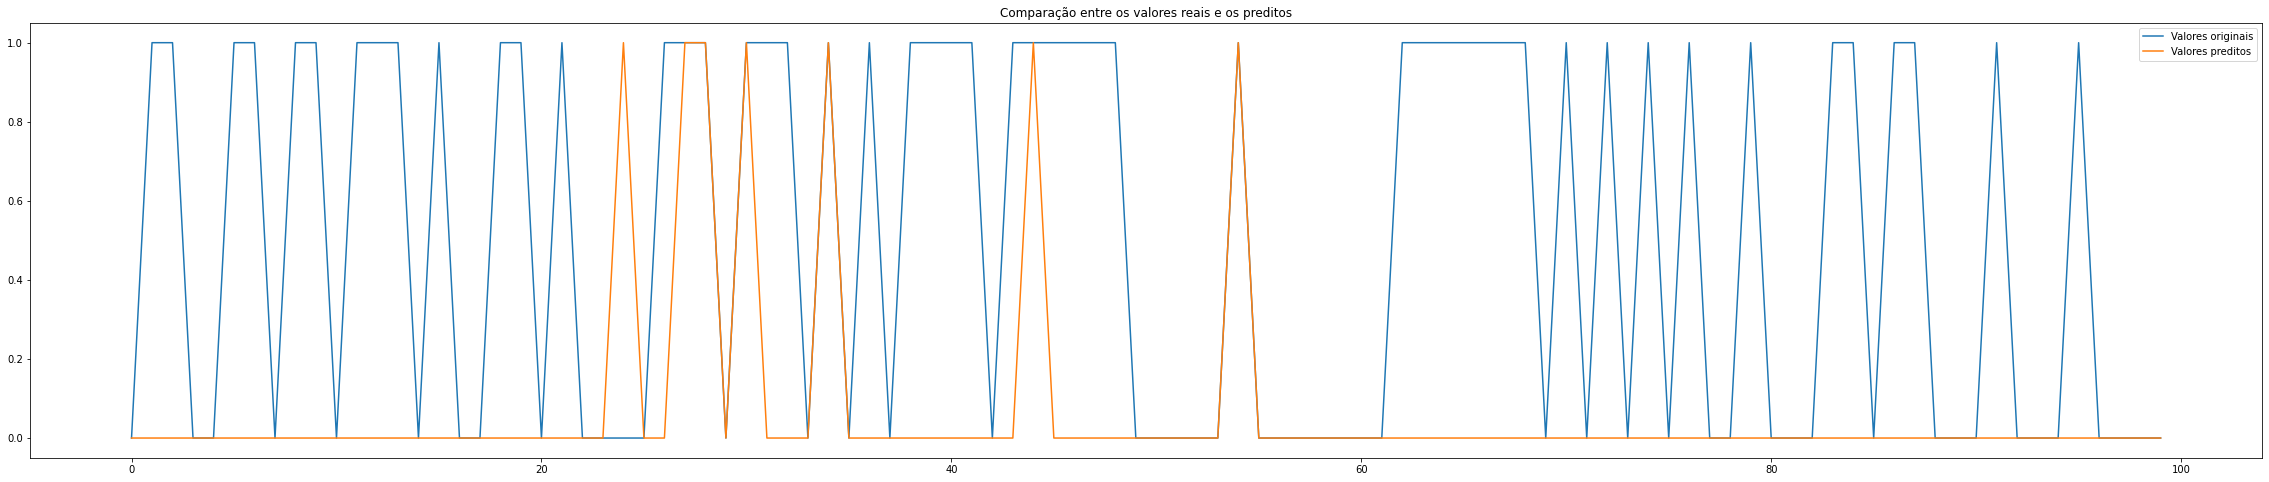

In [166]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores originais")
plt.plot(x_ax, y_pred_test, label="Valores preditos")
plt.title("Comparação entre os valores reais e os preditos")
plt.legend()
plt.show();

In [123]:
resultado_xgbr = df["Clicked on Ad"].unique()
print(f"{resultado_xgbr}")

[0 1]


**Probabilidade de sair cada diagnóstico:**

In [ ]:
probas = publicidade_xgbc.predict_proba(X_test)
probas

In [125]:
tabela_publicidade_xgbc = pd.DataFrame()

In [126]:
tabela_publicidade_xgbc["Amostra existente"] = y_test

In [127]:
tabela_publicidade_xgbc["Predição"] = y_pred_test

In [128]:
tabela_publicidade_xgbc

,Amostra existente,Predição
175,0,0
758,1,0
847,0,0
153,0,0
887,1,0
...,...,...
254,1,0
649,0,0
269,0,0
300,0,0


Salvando a tabela

In [129]:
tabela_publicidade_xgbc.to_csv("11-publicidade_xgbc.csv")

Salvando o estimador...

In [130]:
import pickle

In [131]:
with open("publicidade_xgbc.pkl", "wb") as f:
    pickle.dump(publicidade_xgbc, f)

In [132]:
with open("publicidade_xgbc.pkl", "rb") as f:
    
    publicidade_xgbc = pickle.load(f)

# **Otimização Bayesiana**



---



---



---



In [374]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.pipeline import Pipeline

def pipe_pre_breast_cancer(drop_not_features=["Clicked on Ad"], col_target="Clicked on Ad",
                             inputer_num_strategy="mean",
                             encoding="ordinal"):
    '''
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''

    X = df.drop(columns=drop_not_features)
    y = df[col_target]
    
    X_train_ob, X_test_ob, y_train_ob, y_test_ob = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train_ob.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
    
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])
    
    else:
        
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train_ob.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train_ob, X_test_ob, y_train_ob, y_test_ob, pre_processador

In [375]:
X_train_ob, X_test_ob, y_train_ob, y_test_ob, pre_processador = pipe_pre_breast_cancer(drop_not_features=["Clicked on Ad"], 
                                                                            col_target="Clicked on Ad",
                                                                            inputer_num_strategy="mean",
                                                                            encoding="ordinal")

In [376]:
from hyperopt import hp, tpe, fmin, Trials, space_eval

In [377]:
hps_space = {"learning_rate" : hp.choice("learning_rate", [0.001, 0.0001, 0.00001]),
             "n_estimators" : hp.choice("n_estimators", range(1, 5000)),
             "max_depth" : hp.choice("max_depth", range(1, 11)),
             "colsample_bytree": hp.choice("colsample_bytree", [0.2, 0.9]),
             "subsample": hp.choice("subsample", [0.2, 0.9])}

In [378]:
from sklearn.model_selection import cross_validate

In [379]:
def objective(hps_space):
    
    pipe = Pipeline([("pp", pre_processador),
                     ("xgbr", XGBClassifier(**hps_space))])

    # =============================================

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    results = cross_validate(pipe,
                             X_train_ob, y_train_ob, 
                             cv=splitter,
                             scoring="accuracy",
                             n_jobs=-1)

    mean_f1 = results["test_score"].mean()

    # como o valor vai ser minimizado, mas queremos MAXIMIZAR o f1, colocamos esse sinal negativo
    return mean_f1

In [380]:
ts = Trials()

best_hps = fmin(objective,
                space=hps_space,
                algo=tpe.suggest,
                trials=ts,
                max_evals=10)

100%|██████████| 10/10 [01:17<00:00,  7.79s/it, best loss: 0.9455555555555556]


In [381]:
# pré-resposta da otimização
best_hps

{'colsample_bytree': 1,
 'learning_rate': 0,
 'max_depth': 0,
 'n_estimators': 3507,
 'subsample': 1}

In [382]:
# a resposta final, vem com o space_eval
best_hps = space_eval(hps_space, best_hps)
best_hps

In [399]:
XGBClassifier(**best_hps)

XGBClassifier(colsample_bytree=0.9, learning_rate=0.001, max_depth=1,
              n_estimators=3508, subsample=0.9)

In [401]:
pipe = Pipeline([("pp", pre_processador),
                 ("xgbr", XGBClassifier(**best_hps))])

pipe.fit(X_train_ob, y_train_ob)



Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Daily Time Spent on Site',
                                                   'Age', 'Area Income',
                                                   'Daily Internet Usage',
                                                   'Male']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                   


Métricas de avaliação de treino:
[[436  14]
 [ 22 428]]


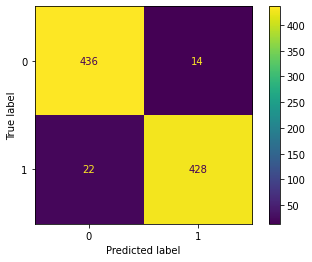

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       450
           1       0.97      0.95      0.96       450

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900


Métricas de avaliação de teste:
[[48  2]
 [ 4 46]]


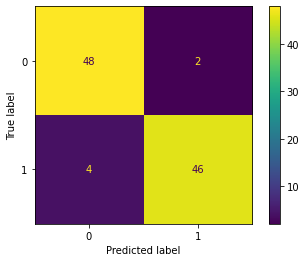

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.96      0.92      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [402]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train_ob = pipe.predict(X_train_ob)

print(confusion_matrix(y_train, y_pred_train_ob))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_ob)
plt.show()

print(classification_report(y_train_ob, y_pred_train_ob))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_ob = pipe.predict(X_test_ob)

print(confusion_matrix(y_test, y_pred_test_ob))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_ob)
plt.show()

print(classification_report(y_test_ob, y_pred_test_ob))

In [403]:
probas_y_pred_test_ob = publicidade_xgbc.predict_proba(X_test_ob)

In [397]:
tabela_publicidade_xgbc_ob = pd.DataFrame()

In [404]:
y_test_ob.shape, y_pred_test_ob.shape

((100,), (100,))

In [405]:
tabela_publicidade_xgbc["Amostra existente"] = y_test_ob

In [406]:
tabela_publicidade_xgbc["Predição"] = y_pred_test_ob

In [407]:
tabela_publicidade_xgbc

,Amostra existente,Predição
789,1,1
871,0,0
670,0,0
221,0,0
310,0,0
...,...,...
739,0,0
185,1,1
507,1,1
276,0,0


Salvando a tabela

In [408]:
tabela_publicidade_xgbc.to_csv("11-publicidade_xgbc.csv")

Salvando o estimador...

In [371]:
import pickle

In [409]:
with open("publicidade_xgbc.pkl", "wb") as f:
    pickle.dump(publicidade_xgbc, f)

In [373]:
with open("publicidade_xgbc.pkl", "rb") as f:
    
    publicidade_xgbc = pickle.load(f)



---



---



---



#**INTERPRETABILIDADE DO MODELO GLOBALMENTE**

**Transformando as Features categóricas em numéricas - OneHotEnconder - Features de dados binários:**

In [308]:
ohe =  OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[["Male"]])

df["Male"] = ohe.transform(df[["Male"]]).toarray()

**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [310]:
# "Ad Topic Line", "City", "Country", "Timestamp", "Date", "Hour"
oe =  OrdinalEncoder()
oe.fit(df[["Ad Topic Line", "City", "Country", "Timestamp", "Date", "Hour"]])


df[["Ad Topic Line", "City", "Country", "Timestamp", "Date", "Hour"]] = oe.transform(df[["Ad Topic Line", "City", "Country", "Timestamp", "Date", "Hour"]])

**Vamos escalonar todas as Features, pois a amplitude entre os dados está muito grande, isso pode causar um viés no resultado final:**

In [312]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Date', 'Hour'],
      dtype='object')

In [313]:
ssc = StandardScaler()

ssc.fit(df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country','Timestamp', 'Date', 'Hour']])
h= ssc.transform(df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country','Timestamp', 'Date', 'Hour']])
df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country','Timestamp', 'Date', 'Hour']] = h

In [315]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Hour
0,0.249267,-0.114905,0.509691,1.734030,-1.415086,1.700304,0.962695,1.424572,-0.209578,0,-0.214751,-1.588168
1,0.961132,-0.570425,1.002530,0.313805,-0.122976,1.492546,-1.038750,0.451875,-0.088335,0,-0.110587,-1.515117
2,0.282083,-1.139826,0.356949,1.287589,0.230363,-1.344415,0.962695,0.981136,-0.458994,0,-0.457800,1.194735
3,0.577432,-0.798185,-0.014456,1.501580,1.397766,1.621499,-1.038750,-0.177517,-1.536330,0,-1.551521,-1.417716
4,0.212664,-0.114905,1.408868,1.038731,0.923184,1.141508,0.962695,-0.277648,0.926648,0,0.913691,-1.264656
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.502963,-0.684305,1.222006,0.651314,-0.535204,-1.290685,-1.038750,0.008440,-1.030571,1,-0.995980,1.403453
996,-0.864601,1.023896,0.953329,-1.038735,-0.486707,0.006007,-1.038750,-1.278953,0.233827,1,0.184544,-1.449023
997,-0.843775,1.707176,-0.938570,-1.358924,-0.819260,1.116434,-1.038750,0.351744,-1.210704,1,-1.169586,0.745992
998,-0.596389,-1.936986,-0.975484,0.181172,0.490171,1.607171,0.962695,-0.434996,-0.268468,0,-0.266833,-1.393365


**Separar em features e target...**

In [316]:
X = df.drop(columns=["Clicked on Ad"])
y = df["Clicked on Ad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)

In [317]:
xgbc_shap = XGBClassifier().fit(X_train, y_train)

In [ ]:
!pip install shap
import shap

In [319]:
explainer = shap.Explainer(xgbc_shap, X_train)

In [320]:
shap_vals = explainer.shap_values(X_train)

In [321]:
clik = df["Clicked on Ad"].unique()
print(f"{clik}")

[0 1]


**Features que mais impactaram na escolha das espécies durante a geração do predict:**

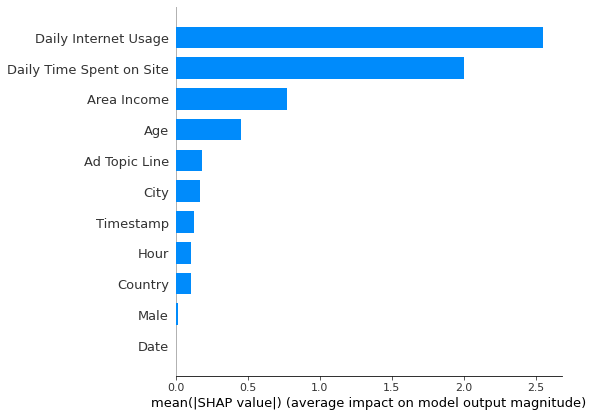

In [322]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")